# Session 2: Getting to Know Your Data – Types, Tables, and First Plots in R
### Data analysis for Economics and Management (Academic Course 2025-2026)

Alba Miñano-Mañero (alba.minano@iseg.ulisboa.pt)

Today's session aims to help you start using **R effectively for data analysis**. We'll begin with the fundamentals of R programming and gradually move toward creating and interpreting basic data visualizations.

By the end of this session, you should be able to:

1. Understand the **basic data types** in R and how to create and store them  
2. Get started with the **`ggplot2`** package for creating graphics  
3. Create and interpret:
    - **Frequency tables**  
    - **Bar charts**  
    - **Histograms**  
    - **Pie charts**  

## 1. Data types in R

R has **six base data types**, but we typically use **four** for data analysis:

1. **Logical**
- Represents `TRUE` or `FALSE` values.
- Commonly used for condition checks and logical comparisons.
- Abbreviation: (`lgl`)

2.  **Integer**

- Whole numbers stored with an L suffix.
- Takes up less memory than doubles because the have no decimals. 
- Abbreviation: (`int`)

3.  **Double**

- Numeric and real numbers. 
- Abbreviation: (`dbl`)

4. **Character**

- Store text (strings)
- Abbreviation: (`chr`)

It is important to understand data types in R because many functions are data-type specific—meaning they will only work correctly or efficiently when given input of the expected type, and may throw errors or return unexpected results otherwise.

Some useful functions to work with data types are:

- Returns the **data type** of the object: `typeof(x)`.  

- To knoe the type of the object: `is.character(x)`, `is.logical(x)`, `is.numeric(x)`

    → Return **TRUE/FALSE** depending on whether the object is of the specified type.

- **Convert** an object from any type to another: `as.character(x)`, `as.logical(x)`, `as.integer(x)` → 

> Before we see some examples, a small note about variable creation:  
> In R, you can assign values to variables using either `<-` or `=`:
>   - **`<-`** is the traditional and most widely used assignment operator in R.
>   - **`=`** can also assign values to variables, but it is more commonly used for assigning function arguments (i.e, `mean(x = c(1, 2, 3))`).
> Remeber also that nothing prevents R from overwriting variable values. So if we do `x = 5` and right after `x = 6`, `x` now holds the value 6. Be cautious when reusing variable names to avoid losing important data!

Let's start with a simple example:


In [1]:

x <- 5.2

cat("Is x numeric?", is.numeric(x), '\n')
cat("Is x an integer? ", is.integer(x), '\n')
cat("Type of x: ", typeof(x), '\n')

Is x numeric? TRUE 
Is x an integer?  FALSE 
Type of x:  double 


**What did we do in these lines of code?**

First, we created a variable `x` and assigned it the value 5.2. Then, we used different functions to check the type of `x`. These functions return `TRUE` or `FALSE` depending on whether `x` matches the expected type.

To print the results, we used `cat()`, which concatenates multiple strings and outputs them as a single line. Since we had several pieces of information to display on separate lines, we included the newline character `\n` to ensure each output appears on a new line.

Using `cat()` instead of `print()` helps create cleaner, more readable output without extra quotes or formatting.

Let's see some examples of different data types:

In [2]:

this_is_int <- 5L   # why did we write the L suffix?
cat("Class of this_is_int:", typeof(this_is_int), "\n")

this_is_float <- 5.2  # by default numeric is double precision float
cat("Class of this_is_float:", typeof(this_is_float), "\n")

this_is_a_string <- 'abc'
cat("Class of this_is_a_string:", typeof(this_is_a_string), "\n")

this_is_bool <- TRUE
cat("Class of this_is_bool:", typeof(this_is_bool), "\n")

this_is_none <- NULL
cat("Class of this_is_bool:", typeof(this_is_none), "\n")

Class of this_is_int: integer 
Class of this_is_float: double 
Class of this_is_a_string: character 
Class of this_is_bool: logical 
Class of this_is_bool: NULL 


In the last line we assigned the special value `NULL` to the variable `this_is_none`, representing the absence of a value or an empty object in R.


R understands **logical comparisons** directly. This means that if you compare two objects using standard math comparison symbols (`<`, `>`, `==`, `!=`, `<=`, `>=`), R will automatically evaluate the expression and return either `TRUE` or `FALSE` depending on whether the comparison is correct. For instance:

In [3]:
5 < 3     # Is 5 less than 3? → FALSE
10 == 10  # Is 10 equal to 10? → TRUE
4 != 2    # Is 4 not equal to 2? → TRUE

[1] FALSE

[1] TRUE

[1] TRUE

#### Good Practices naming variables in R

Just like writing regular text, coding in R involves a certain *personal style*. Two people might write very different-looking code while solving the same problem — and one of the most visible areas where this happens is in how we **name our variables**.

However, regardless of whether we prefer concise or descriptive naming, there are **some basic rules and good practices** everyone should follow in R:


1. **Valid variable names** can include:
   - **Letters** (A–Z, a–z)
   - **Numbers** (0–9) *(but not at the beginning)*
   - **Periods (`.`)** or **underscores (`_`)** (though periods are more common in base R)

2. **Variable names cannot start with a number**, and must begin with a **letter** or a **dot that is not followed by a number**.

3. **Reserved words (keywords)** in R like `if`, `for`, `TRUE`, `NULL`, etc., **cannot** be used as variable names.  
   > You can see all reserved words in R by typing `?Reserved` in the R console.

4. **R is case sensitive**:  
   `Age`, `age`, and `AGE` are three different variables.

5. **Be descriptive, not cryptic**:  
   - Good: `total_score`, `user_age`  
   - Bad: `x`, `data1` *(unless used very locally)*  
   - Use **nouns for variables**, **verbs for functions**, and **adjectives for booleans**.

6. Although you *can* use names in any language, using **English** is preferred so your code is understandable to a wider audience.

7. **Avoid overwriting built-in R functions** like `mean`, `sum`, or `data.frame`.  
   - If you create a variable called `mean`, you won’t be able to use the original function until you restart your session.

With this, we wrap up our brief introduction to **data types** in R. In the next session, we'll take a closer look at **data structures**, which will help us organize and manage data more effectively.

Now, it's time to explore the `ggplot2` package and learn how to use it to create some of the **graphs and descriptive statistics** we've discussed in class — such as bar charts, histograms, and pie charts.



## 2. `ggplot2`

`ggplot2` (short for *Grammar of Graphics Plotting*) is one of the most widely used packages for data visualization in R. It provides a structured, layered approach to creating graphics, making it easier to design complex plots in a logical and readable way.

`ggplot2` has become the de facto standard for visualizing data in R. Many other R packages for statistical modeling and data analysis are designed to work seamlessly with `ggplot2`, making it a central tool in the R ecosystem.

Rather than relying on low-level plotting commands, `ggplot2` encourages users to build plots step-by-step by adding layers that define data, visual elements (geometries), statistical transformations, scales, labels, and themes. This approach promotes clarity, reusability, and flexibility in how visualizations are constructed.

Understanding `ggplot2` is essential for any data analyst or scientist using R, as it allows for the creation of clean, publication-quality visualizations with relatively little code. It also fosters good visualization habits by encouraging a consistent and logical mapping between data and its graphical representation.

> **Important:** Since we are all using the same pre-configured environment (or running on Binder), **you do NOT need to install `ggplot2` manually**. You can simply load it in your R session with `library(ggplot2)` and start using it right away. Same applies to `readxl` library. 



In [4]:
library(ggplot2)
library(readxl)


To support data manipulation, summary statistics, and nicely formatted tables we will also use the following libraries:
- `dplyr`: for efficient data wrangling and transformation
- `knitr`: for printing clean and readable tables (e.g., with `kable()`)
- `psych`:   for descriptive statistics and psychological data analysis tools

In [ ]:
library(dplyr)
library(knitr)
library(psych)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Let's load a fictitious dataset containing information about wage and education:

In [6]:
data = read_excel("data/session_2/education_wage.xlsx")

> **Important:**  
>   Because we are using the pre-configured Binder environment, all file paths are relative.  
>   Otherwise, remember to set your working directory using the `setwd()` function in R.


We can explore our data:

In [7]:
head(data)

id,Monthly wage (Eur),Education (years),Predicted Wage (Eur)
<dbl>,<dbl>,<dbl>,<dbl>
1,550,4,501.4429
2,560,4,501.4429
3,580,5,553.3147
4,650,7,657.0583
5,670,7,657.0583
6,725,9,760.8019


❓**Can you tell the data type of each column in the dataset?**

### 2.1 Frequency tables

In class, we’ve learned that frequency tables are a tool to summarize data.

A frequency table lists each unique category (or value) of a variable in one column, and the corresponding count of how many times that category appears in the dataset in another column. 

Frequency tables often include relative frequencies or percentages, which show the proportion of each category relative to the total number of observations. This helps us understand not only the raw counts but also the distribution of data across categories. 

By organizing data in this way, frequency tables provide a summary that makes it easier to detect patterns, trends, or imbalances within the data. 


❓ **Do you remember what we do to continuous numerical data to represent it in frequency tables?**

In R, we will use the table() function to create a frequency table for your nominal variable. 

> **Note:**
> While "years" typically represent time and are treated as a continuous variable, there are situations where they might be considered categorical.
> For example, if individuals complete full years of education one at a time (e.g., 1st grade, 2nd grade, etc.), we could argue that each year is a distinct category rather than part of a smooth, continuous scale.
> So, context matters when deciding whether to treat "years" as continuous or categorical!

In [8]:
freq_table <- table(data$`Education (years)`) # if your variable name contains spaces, make sure to enclose it in backticks ` or quotes " "

print(freq_table) 


 4  5  6  7  9 12 15 16 18 
 2  1  1  2  4  4  5  2  1 


The output displays the counts of each unique value in the variable Education (years). The first row lists the unique values of the variable (i.e., the different years of education), while the second row shows how many observations fall into each category. For example, there are 2 people with 4 years of education, 1 person with 5 years, and so on. 

### 2.2 Bar charts 

To create a plot with **ggplot2**, you start by calling the `ggplot()` function, where you specify the dataset and map variables to aesthetics inside `aes()`.

```r
ggplot(data =  your_data , aes(x = your_x_variable)) +    
  geom_bar() +  
  labs(title = "graph_title",  
       x = "X Axis title",  
       y = "Y axis title")

```

What this function is doing:

- ggplot(data = data, aes(x = ...)): Initializes the plot with the data and defines which variable goes on the x-axis.
- geom_bar(): Adds a bar chart layer that counts the occurrences of each category in the x variable.
- labs(): Adds labels for the title, x-axis, and y-axis to make the plot easier to understand.

In our case, we can plot the barchart of education as:


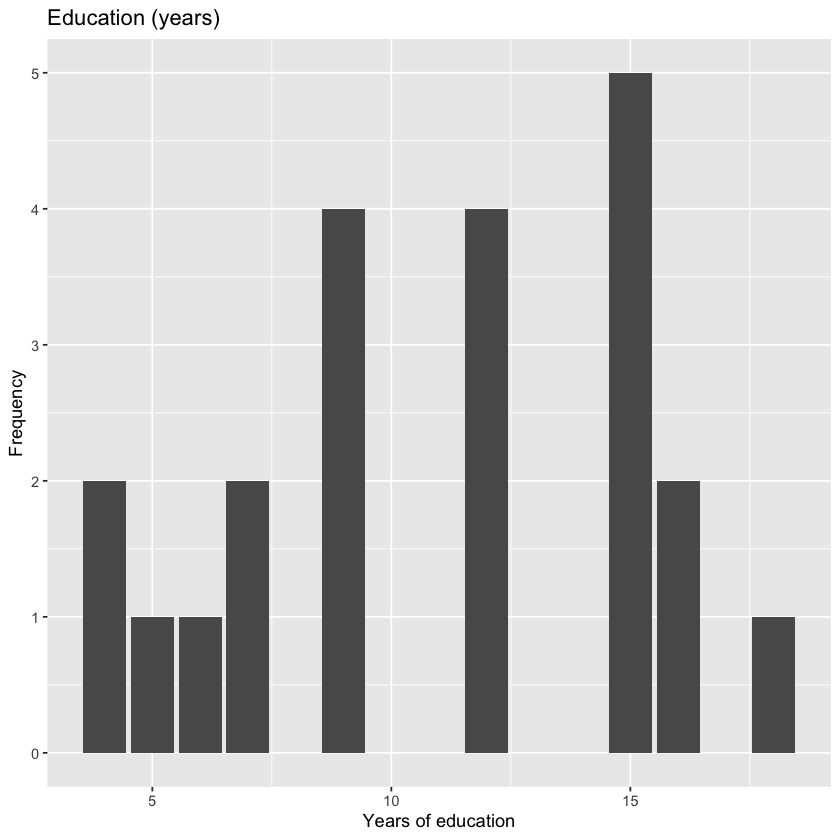

In [9]:
ggplot(data = data, aes(x = `Education (years)`)) +    
geom_bar() +  
labs(title = "Education (years)",  
      x = "Years of education",  
      y = "Frequency")

We can further customize the plot axes to show all category numbers by using `scale_x_continuous()` and specifying the breaks. For example, to show all years from 1 to 18 on the x-axis, use:

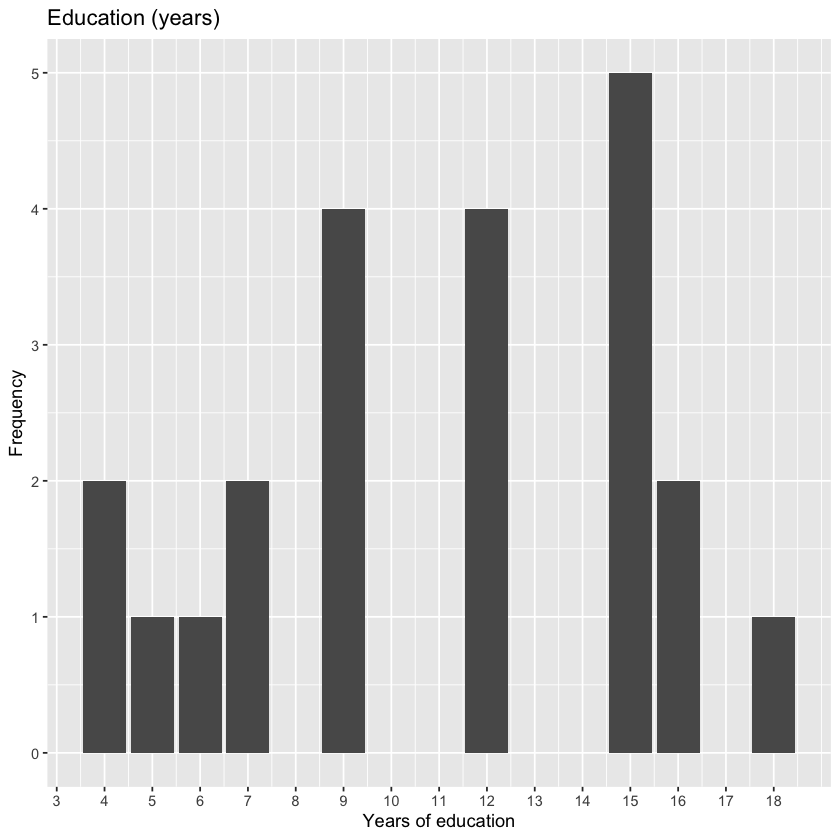

In [10]:
ggplot(data = data, aes(x = `Education (years)`)) +
  geom_bar() +  
  scale_x_continuous(breaks = 1:18) +
  labs(title = "Education (years)",
       x = "Years of education",
       y = "Frequency")


Additionally, you can save your plot either by using R commands such as `ggsave("path/filename.png")` or by manually exporting the image from the plot pressing on the disk. 

### 2.3 Histograms

A **histogram** is a graphical representation that shows the distribution of data by grouping values into bins (intervals) and displaying the density of observations in each bin. 


To create a histogram in R using `ggplot2`, we simply need to change the geometry object:

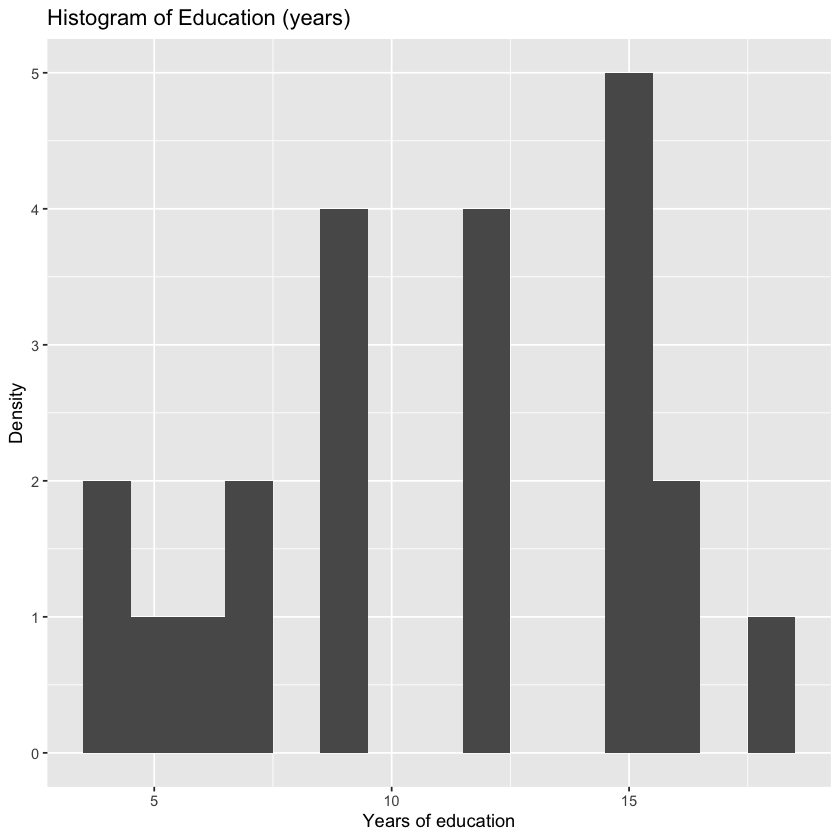

In [11]:

ggplot(data = data, aes(x = `Education (years)`), y=..density..) + 
  geom_histogram(binwidth = 1) +
  labs(title = "Histogram of Education (years)",
       x = "Years of education",
       y = "Density")

The most important difference between calling `ggplot` for the histogram and for the frequency table is `geom_histogram(binwidth = 1)`.
This adds a histogram layer to the plot. The `binwidth = 1` argument sets the width of each bin (interval) to 1 unit, grouping the data into bins of size 1 along the x-axis. When you use density in `aes(x = `Education (years)`, y = ..density..)` the histogram is scaled so that the area under the histogram sums to 1. Remeber that histograms are about density. 

❓**Compare the histogram with the frequency table you created earlier:**

**1. What different information does each provide?**

**2. Which one is more useful for understanding the overall shape and spread of the data?**

**3. What happens when you increase the `binwidth` in a histogram? How does it affect the representation of the data?**  

**4. In which scenario is it that the histogram bars are equivalent to frequency counts?**

### 2.4 Pie Charts 

A **pie chart** is a circular graph divided into slices to illustrate **numerical proportions**. Each slice of the pie represents a category, and the size of the slice is proportional to the **count** or **percentage** of observations in that category relative to the total. Pie charts are particularly useful when you want to visualize the **distribution of a categorical variable** and show how each category compares to the whole.

**When to Use a Pie Chart?**
- You are working with **categorical** data.
- You want to emphasize **part-to-whole** relationships.
- There are relatively **few categories**. 

**To create a pie chart in R using `ggplot2`:**

1. Summarize your data
    You first need a frequency table (a summary) of the variable you want to show. This tells us how many times each category appears.

2. Create a bar plot
    Even though we want a circular chart, we actually start by making a bar plot of the counts. Each bar will represent a slice of the pie.

3. Transform the bar plot into a circle
    You convert the bar plot into a pie chart by switching the coordinate system using `coord_polar("y")`. This "bends" the bars around a circle.

4. Label and customize the chart



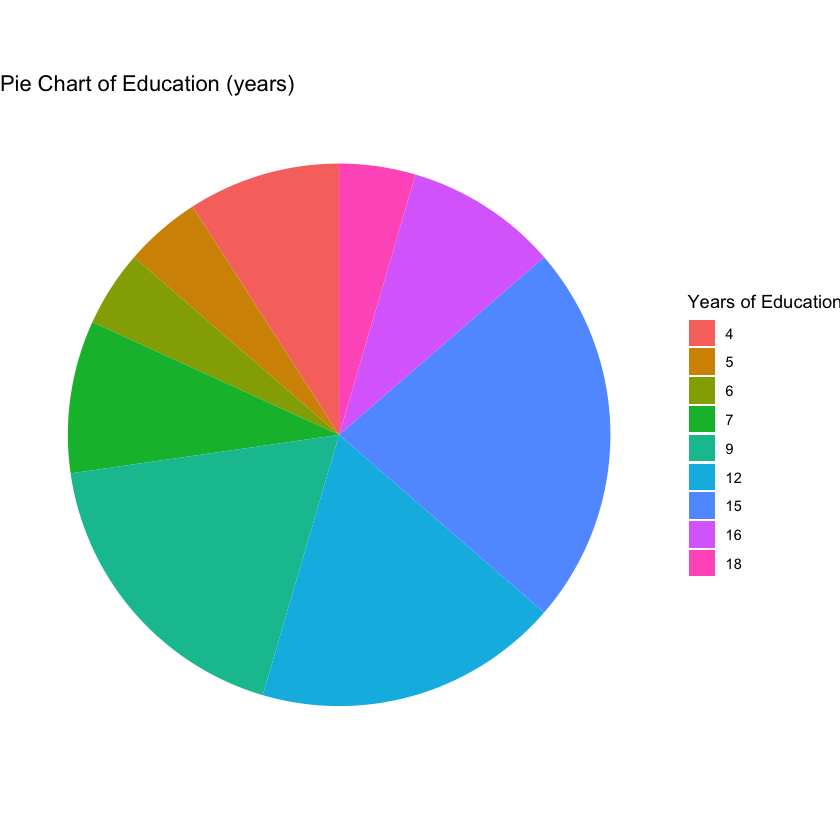

In [12]:
# 1. create a frequency table (you know this already)
freq_table <- table(data$`Education (years)`)

# 2: Convert the table to a data frame (more on data frames next session)
df_freq <- as.data.frame(freq_table)
colnames(df_freq) <- c("Education", "Count")

# 3: build the pie chart by chaning the plot
ggplot(df_freq, aes(x = "", y = Count, fill = factor(Education))) +
  geom_bar(width = 1, stat = "identity") +      # we first create a bar chart
  coord_polar(theta = "y") +                    # we then convert to a pie chart
  labs(title = "Pie Chart of Education (years)",
       fill = "Years of Education") +
  theme_void()                                  # eliminates axis

Creating a pie chart with R is relatively easy — just a few lines of code! But imagine trying to make one by hand. What would you need?

You'd not only need a ruler to draw a perfect circle, but also a protractor (or calculator) to figure out the angle for each slice of the pie. Why?

Because each category's share must be represented as a proportion of 360 degrees — the total angle of a circle.

For example, if a category makes up 25% of the total, it should take up: 25% of 360° = 90°

That’s why, even though computers can handle all the geometry for us, it’s still important to understand the logic behind pie charts: they display relative proportions by dividing a circle into segments, where each angle reflects the percentage of the category it represents.

> **Note:**  
> We said pie charts are most effective when there are **relatively few categories** — typically **fewer than 6**:  
> 
> - The more categories you add, the **smaller each slice becomes**, especially when values are relatively equal. For example, with **6 equally sized categories**, each slice would be about **60°**. Smaller angles are mor difficult for our eyes to understand. 
> - Colors become **hard to differentiate** when there are too many slices close together, making the chart difficult to read.  
> - There can be **extreme cases**, like one big category and several tiny ones, but adding many categories will typically reduce clarity.  

## 3. Descriptive statistics 


We can use the `describe()` function from the package `psych` to get a comprehensive summary of your continuous variable. 

The output of this function will be: 

- **n:** Number of valid (non-missing) observations  
- **mean:** Arithmetic mean  
- **sd:** Standard deviation  
- **median:** Median value  
- **mad:** Median absolute deviation  
- **min:** Minimum value  
- **max:** Maximum value  
- **range:** Range (max - min)  
- **skew:** Skewness (measure of asymmetry)  
- **kurtosis:** Kurtosis (measure of peakedness)  
- **se:** Standard error of the mean 

Because the output from `describe()` will be a dataframe, we use `kable()` from the **knitr** package to create clean, well-formatted tables in R. It makes the output easier to read and present, especially in reports or notebooks, by converting data frames into neat tables with proper alignment and styling. This is particularly helpful when sharing results or embedding tables in documents.

describe_output <- data.frame(describe(data$`Monthly wage (Eur)`))



In [13]:
describe_output <- data.frame(describe(data$`Monthly wage (Eur)`)) # always remember the quotes for variable names with spaces 

In [14]:
describe_output

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,22,864.5455,251.6749,755,853.3333,237.216,550,1300,750,0.4636522,-1.380196,53.65727


In [15]:
kable(describe_output)



|   | vars|  n|     mean|       sd| median|  trimmed|     mad| min|  max| range|      skew|  kurtosis|       se|
|:--|----:|--:|--------:|--------:|------:|--------:|-------:|---:|----:|-----:|---------:|---------:|--------:|
|X1 |    1| 22| 864.5455| 251.6749|    755| 853.3333| 237.216| 550| 1300|   750| 0.4636522| -1.380196| 53.65727|

Remember that in class we have learnt how to interpret this results: 

- When mean > median, the distribution is likely right-skewed (tail to the right).

- Skewness > 1 or < -1 indicates a highly skewed distribution.

- Kurtosis > 3 suggests heavier tails than a normal distribution (more extreme values).

❓ **Can you apply this to the monthly wage we just described?**

We can summarize multiple variables by generating separate descriptive statistics for each variable and then combining them by rows. 

For example, we create one description for each variable using the `describe()` function, which returns a data frame of statistics identified by their names (e.g., mean, sd, median). We then join these data frames together row-wise to have all summaries in one table.

We will learn more about how to **merge** and manipulate data frames in the next session, but the key idea here is that we can produce dta frames with `describe()` that can  then be combined and reshaped for easier comparison and presentation.

Let's see it in practice: 

In [16]:
# 1. Calculate descriptive statistics and convert to dataframe 
descriptive_var1 <- data.frame(describe(data$`Monthly wage (Eur)`))
descriptive_var2 <- data.frame(describe(data$`Education (years)`))

In [17]:
class(descriptive_var1)

[1] "data.frame"

We can combine them using `rbind()`. Because `describe()` gives us all by rows, this combination will just add another row to our first descriptive data frame. We will transpose it  using `t()` (the very same operation as with matrices!) to obtain a column data frame. 

In [18]:
combined_descriptive <- rbind.data.frame(descriptive_var1, descriptive_var2)


In [19]:
combined_descriptive

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,22,864.5455,251.674909,755,853.33333,237.2160,550,1300,750,0.4636522,-1.380196,53.6572709
X11,1,22,11.0000,4.309458,12,11.11111,4.4478,4,18,14,-0.1533462,-1.387665,0.9187795


In [20]:
transposed_descriptive <- t(combined_descriptive)
transposed_descriptive

,X1,X11
vars,1.0000000,1.0000000
n,22.0000000,22.0000000
mean,864.5454545,11.0000000
sd,251.6749088,4.3094580
median,755.0000000,12.0000000
trimmed,853.3333333,11.1111111
mad,237.2160000,4.4478000
min,550.0000000,4.0000000
max,1300.0000000,18.0000000
range,750.0000000,14.0000000


To be able to edit it easily, we are going to convert it to a data frame and will change the name of variables. 

In [21]:
transposed_df <- as.data.frame(transposed_descriptive)
colnames(transposed_df) <- c("Monthly wage (Eur)", "Education (years)")

The function `colnames()` in R is used to get or set the column names of our dataframe and retrieves the current column names of the. 
Because we use it with the assignment operator `<-`, it sets or changes the column names of transposed_df to the specified character vector.

In this example, the two columns of `transposed_df` are renamed to "Monthly wage (Eur)" and "Education (years)".

We will finish the formatting by rounding our numbers and reformatting to a table with `kable()`

In [22]:
rows_to_round <- c("mean", "sd", "median", "trimmed", "mad", "skew", "kurtosis", "se")
transposed_df[rownames(transposed_df) %in% rows_to_round, ] <- round(transposed_df[rownames(transposed_df) %in% rows_to_round, ], 1)


This is working by creating a vector named `rows_to_round` that contains the names of the summary statistics we want to round to one decimal place. Then, we select the rows in `transposed_df` whose row names match any of the names in `rows_to_round`. This selection is performed using the expression `rownames(transposed_df) %in% rows_to_round`, which returns a logical vector indicating which rows to keep. After, we apply the `round()` function to these selected rows, rounding each numeric value to 1 decimal place. Finally, we assign the rounded values back to the same rows in the transposed_df data frame, updating it in place. 

In [23]:
kable(transposed_df)



|         | Monthly wage (Eur)| Education (years)|
|:--------|------------------:|-----------------:|
|vars     |                1.0|               1.0|
|n        |               22.0|              22.0|
|mean     |              864.5|              11.0|
|sd       |              251.7|               4.3|
|median   |              755.0|              12.0|
|trimmed  |              853.3|              11.1|
|mad      |              237.2|               4.4|
|min      |              550.0|               4.0|
|max      |             1300.0|              18.0|
|range    |              750.0|              14.0|
|skew     |                0.5|              -0.2|
|kurtosis |               -1.4|              -1.4|
|se       |               53.7|               0.9|

You can select the displayed table in your R environment and simply copy-paste it into Excel or other applications for further use.
Alternatively, you can export the table programmatically using packages like `clipr`, which allows you to copy data directly to the system clipboard. 

In [26]:
library(clipr)
write_clip(transposed_df, allow_non_interactive = TRUE) 